In [1]:
pip install pmdarima


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import pmdarima as pm


In [3]:
df = pd.read_csv ("AirPassengers.csv")

In [4]:
df.head

<bound method NDFrame.head of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [5]:
df[0:2]

,Month,#Passengers
0,1949-01,112
1,1949-02,118


<BarContainer object of 144 artists>

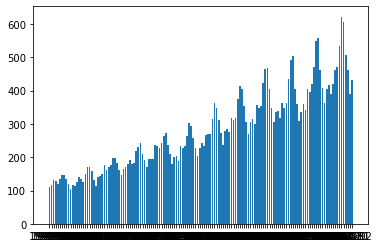

In [6]:
month = df['Month']
passengers = df['#Passengers']
plt.bar(month, passengers)

<AxesSubplot:xlabel='Month', ylabel='#Passengers'>

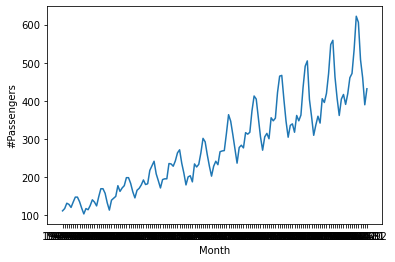

In [7]:
sns.lineplot(data = df, x = "Month", y = "#Passengers")


In [8]:
(df.iloc[-1,1]-df.iloc[0,1])/(len(df['#Passengers'])-1) #-1 because we shold not calcukate the starting period, so substract it

2.237762237762238

In [9]:
df.dtypes #checking the column types


Month          object
#Passengers     int64
dtype: object

In [10]:
#change month to date 
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
#puting month to index and deleting it as column
df.index = df['Month']



In [11]:
del df['Month']



In [12]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df.rename(columns={"#Passengers": "Passengers"}, inplace=True) #changing #Passengers to Passengers

<function matplotlib.pyplot.show(close=None, block=None)>

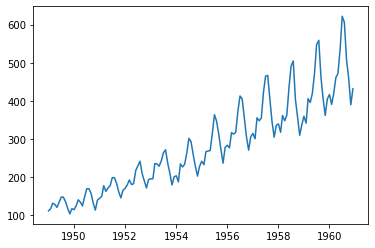

In [14]:
plt.plot(df['Passengers'])
plt.show

In [15]:
#1st step:
#Pandas dataframe with index = Month, and two columns:
#Passengers
#The line based on the calculated slope



In [16]:
slope = (df.iloc[-1,0]-df.iloc[0,0])/(len(df['Passengers'])-1)  #calculating slope

df['slope'] = df['Passengers'] + slope

In [17]:
df

,Passengers,slope
Month,,
1949-01-01,112,114.237762
1949-02-01,118,120.237762
1949-03-01,132,134.237762
1949-04-01,129,131.237762
1949-05-01,121,123.237762
...,...,...
1960-08-01,606,608.237762
1960-09-01,508,510.237762
1960-10-01,461,463.237762


In [18]:
for i in range(2, 4):
    print(i)

2
3


In [19]:
#arange works like range but also for non integer numbers
np.arange(0, 2, 0.5)

array([0. , 0.5, 1. , 1.5])

In [20]:
np.arange(112, 432, slope) # but it's not ending with the last one so 

np.arange(112, 432+slope, slope)
#or use linspace

array([112.        , 114.23776224, 116.47552448, 118.71328671,
       120.95104895, 123.18881119, 125.42657343, 127.66433566,
       129.9020979 , 132.13986014, 134.37762238, 136.61538462,
       138.85314685, 141.09090909, 143.32867133, 145.56643357,
       147.8041958 , 150.04195804, 152.27972028, 154.51748252,
       156.75524476, 158.99300699, 161.23076923, 163.46853147,
       165.70629371, 167.94405594, 170.18181818, 172.41958042,
       174.65734266, 176.8951049 , 179.13286713, 181.37062937,
       183.60839161, 185.84615385, 188.08391608, 190.32167832,
       192.55944056, 194.7972028 , 197.03496503, 199.27272727,
       201.51048951, 203.74825175, 205.98601399, 208.22377622,
       210.46153846, 212.6993007 , 214.93706294, 217.17482517,
       219.41258741, 221.65034965, 223.88811189, 226.12587413,
       228.36363636, 230.6013986 , 232.83916084, 235.07692308,
       237.31468531, 239.55244755, 241.79020979, 244.02797203,
       246.26573427, 248.5034965 , 250.74125874, 252.97

In [21]:
np.linspace(112, 432, len(df))

array([112.        , 114.23776224, 116.47552448, 118.71328671,
       120.95104895, 123.18881119, 125.42657343, 127.66433566,
       129.9020979 , 132.13986014, 134.37762238, 136.61538462,
       138.85314685, 141.09090909, 143.32867133, 145.56643357,
       147.8041958 , 150.04195804, 152.27972028, 154.51748252,
       156.75524476, 158.99300699, 161.23076923, 163.46853147,
       165.70629371, 167.94405594, 170.18181818, 172.41958042,
       174.65734266, 176.8951049 , 179.13286713, 181.37062937,
       183.60839161, 185.84615385, 188.08391608, 190.32167832,
       192.55944056, 194.7972028 , 197.03496503, 199.27272727,
       201.51048951, 203.74825175, 205.98601399, 208.22377622,
       210.46153846, 212.6993007 , 214.93706294, 217.17482517,
       219.41258741, 221.65034965, 223.88811189, 226.12587413,
       228.36363636, 230.6013986 , 232.83916084, 235.07692308,
       237.31468531, 239.55244755, 241.79020979, 244.02797203,
       246.26573427, 248.5034965 , 250.74125874, 252.97

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

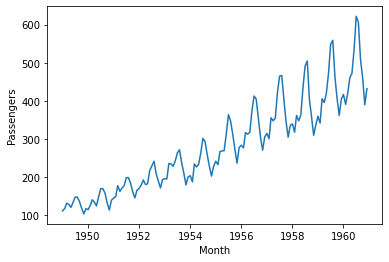

In [22]:
import seaborn as sns

sns.lineplot(x=df.index, y='Passengers', data=df)

In [23]:
import numpy as np
df['SimpleSlope'] = np.linspace(112, 432, len(df))



In [24]:
df
del df['slope']

<AxesSubplot:xlabel='Month'>

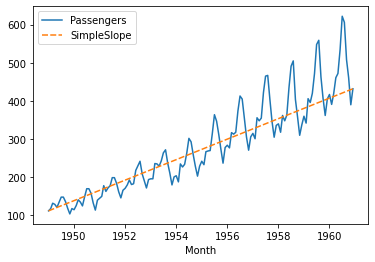

In [25]:
sns.lineplot(data=df)

In [50]:
df['Trend'] = range(1, len(df)+1) #we are doing a simple model with a trend, that trend variable is just a number 1 to number of observations
#we need a regressor
#we take 1 to len + 1 to get rid of the first period 

In [27]:
df

,Passengers,SimpleSlope,Trend
Month,,,
1949-01-01,112,112.000000,1
1949-02-01,118,114.237762,2
1949-03-01,132,116.475524,3
1949-04-01,129,118.713287,4
1949-05-01,121,120.951049,5
...,...,...,...
1960-08-01,606,423.048951,140
1960-09-01,508,425.286713,141
1960-10-01,461,427.524476,142


In [28]:
import statsmodels.formula.api as sm



model = sm.ols(formula="Passengers ~ Trend", data=df)

results = model.fit()

In [29]:
dir(results) #shows everything that is to access in that object --> open in a text editor

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 19 May 2022   Prob (F-statistic):           4.02e-61
Time:                        15:53:44   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     87.6528      7.716     11.359      0.000      72.399     102.907
Trend          2.6572      0.092     28.778      0.000       2.475       2.840
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.905
Skew:                           0.940   Prob(JB):                     4.34e-08
Kurtosis:                       4.454   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
results.params #gives us the coefficients
type(results.params)

pandas.core.series.Series

In [32]:
results.params[1]

2.657183908045976

In [33]:
df['regline'] = results.params.Intercept + results.params.Trend * df.Trend #or

In [34]:
df['regline'] = np.arange(results.params[0], results.params[0]+len(df)*results.params[1], results.params[1])

In [35]:
#removing trend column to plot it nicely
del df['Trend']

<AxesSubplot:xlabel='Month'>

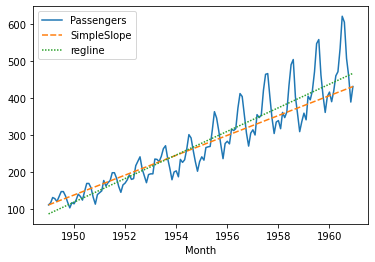

In [36]:
sns.lineplot(data = df)
#regline wn't be touched so much by the starting and ending point, therefore more meaningful 
#maybe the additional number of passengers is not additive but multiplicitive

In [37]:
#whole percentage change 
432/112-1

2.857142857142857

In [38]:
#monthly change multiplicitive
#logarithmic changes --> the great thing is that they are additive

# %logchg = log(110) - log(100)

logchg = np.log(110) - np.log(100)
print(logchg)

0.09531017980432477


In [39]:
logchg = np.log(df.iloc[-1,0]) - np.log(df.iloc[0,0])

In [40]:
print(logchg)


1.3499267169490166


In [41]:
# https://stmorse.github.io/journal/tidyverse-style-pandas.html

In [42]:

def nteWurzel(x, n):
	return x**(1/float(n))
#calculating monthly growth rat (compounded)
log_slope = (nteWurzel((432/112),len(df['Passengers']))-1)
log_slope

0.009418569260659204

In [43]:
df

,Passengers,SimpleSlope,regline
Month,,,
1949-01-01,112,112.000000,87.652778
1949-02-01,118,114.237762,90.309962
1949-03-01,132,116.475524,92.967146
1949-04-01,129,118.713287,95.624330
1949-05-01,121,120.951049,98.281513
...,...,...,...
1960-08-01,606,423.048951,457.001341
1960-09-01,508,425.286713,459.658525
1960-10-01,461,427.524476,462.315709


In [44]:
lg = np.arange(df.iloc[0,0], df.iloc[-1,0], log_slope)

output=[]
start = df.iloc[0,0]
for i in range(144):
    new_value = start*((1+log_slope)**i)
    output.append(new_value)

print(output)
len(output)



[112.0, 113.05487975719383, 114.11969497244245, 115.1945392235457, 116.27950696967241, 117.37469355966155, 118.48019524040188, 119.59610916529004, 120.72253340276868, 121.85956694494489, 123.00730971628981, 124.16586258242002, 125.33532735896205, 126.51580682049983, 127.70740470960689, 128.91022574596334, 130.12437563555892, 131.34996107998248, 132.58708978579918, 133.83587047401596, 135.0964128896361, 136.36882781130376, 137.65322706103942, 138.94972351406705, 140.25843110873376, 141.57946485652275, 142.91294085216097, 144.25897628382157, 145.61768944342253, 146.98919973702257, 148.37362769531458, 149.77109498421817, 151.18172441557178, 152.60563995792575, 154.0429667474367, 155.49383109886486, 156.95836051667476, 158.4366837062406, 159.92893058515696, 161.43523229465643, 162.95572121113423, 164.49053095778197, 166.03979641633043, 167.60365373890343, 169.18224035998284, 170.77569500848682, 172.38415771996148, 174.0077698488873, 175.6466740811019, 177.30101444633922, 178.97093633088718

144

In [45]:
df['lg_slope'] = output

In [46]:
df
del df['SimpleSlope']

<AxesSubplot:xlabel='Month'>

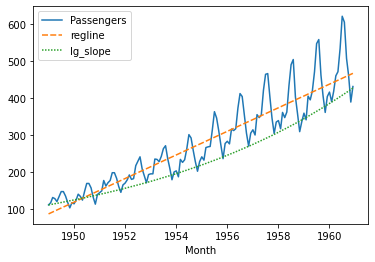

In [47]:
sns.lineplot(data = df)

In [55]:
df

,Passengers,regline,lg_slope,Trend
Month,,,,
1949-01-01,112,87.652778,112.000000,1
1949-02-01,118,90.309962,113.054880,2
1949-03-01,132,92.967146,114.119695,3
1949-04-01,129,95.624330,115.194539,4
1949-05-01,121,98.281513,116.279507,5
...,...,...,...,...
1960-08-01,606,457.001341,412.218329,140
1960-09-01,508,459.658525,416.100835,141
1960-10-01,461,462.315709,420.019910,142


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lg_slope   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4737.
Date:                Thu, 19 May 2022   Prob (F-statistic):          5.94e-111
Time:                        15:57:06   Log-Likelihood:                -598.59
No. Observations:                 144   AIC:                             1201.
Df Residuals:                     142   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2518      2.608     30.777      0.000      75.097      85.406
Trend          2.1474      0.031     68.824      0.000       2.086       2.209
==============================================================================
Omnibus:                       16.857   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.094
Skew:                           0.674   Prob(JB):                     0.000870
Kurtosis:                       2.269   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
del df['logpas_regline']

KeyError: 'logpas_regline'

In [64]:
del df['Trend']

<AxesSubplot:xlabel='Month'>

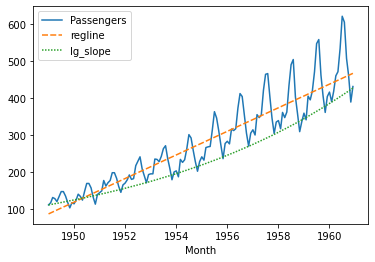

In [65]:
sns.lineplot(data = df)